<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Алексей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Привет, Дима, ок. Взаимно, меня зовут Алексей, давай будем разбираться вместе)

</div>

# Определение возраста покупателей

## Исследовательский анализ данных

### Вводная часть

Ознакомимся с инструкцией по выполнению проекта.

Нашей метрикой качества будет MAE.

План выполнения проекта такой:
- В этом уроке проведем исследовательский анализ набора данных в Jupyter. Затем скачиваем свою тетрадь Jupyter Notebook.
- В 4-м уроке обучим модель в GPU-тренажёре и сохраним результат вывода модели на экран.
- В 5-м уроке объединим в финальной тетради Jupyter Notebook исследовательский анализ данных, код и вывод модели. Затем проанализируем результат обучения модели.

### Описание данных

Данные взяты с сайта [ChaLearn Looking at People](http://chalearnlap.cvc.uab.es/dataset/26/description/). Они находятся в папке `/datasets/faces/`. 

В нашем распоряжении есть одна папка со всеми изображениями (`/final_files`) и CSV-файл `labels.csv` с двумя колонками: `file_name` и `real_age`. 

Извлечь данные из папки нам поможет новый метод [ImageDataGenerator](https://keras.io/preprocessing/image/) —`flow_from_dataframe(dataframe, directory, ...)`.

### Подключение библиотеки

In [27]:
# Подключение библиотеки
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.image import imread

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

### Загрузка данных и изучение датасет

In [2]:
# Загрузка данных
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Узнаем содержимое
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1</b></font>

Я б сказал, что кол-во данных мало, возможно будут другие артефакты и человеческие факторы (изображение вверх ногами, нечеткое изображение). Вполне будет адекватно, если в датасете около 1 млн фотографий, а также с учетом разных ракурсов головы, т.е. чуть сбоку, вверх, вниз т.д. 
    
Поскольку архиектура `ResNet50` предназначена для обучения больших данных. Есть опасность, что модель может переобучать, придать ей очень маленький датасет. Поэтому, зная такой архиектурный нюанс, добавляем `backbone`, т.е. замораживаем, чтобы избежать переобучения.

</div>

In [4]:
# Рассмотрим детально о датасате
display(labels.describe(include='all'))

,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,002904.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000


Здесь на основе полученного результата можно сделать вывод, что чаще всего в фотографиях встречаются люди с возрастом `30 лет`.

In [5]:
print('Количество людей с возрастом 1 года:', labels[labels['real_age'] == labels['real_age'].min()]['real_age'].sum())

print('Количество люди с возрастом 100 лет:', labels[labels['real_age'] == labels['real_age'].max()]['real_age'].sum())

Количество людей с возрастом 1 года: 149
Количество люди с возрастом 100 лет: 100


In [6]:
print('Размер выборки:', labels.shape)

Размер выборки: (7591, 2)


In [7]:
# Проверим на пропущенные значения
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [8]:
# Проверяем на дублиующие значения
labels.duplicated().sum()

0

Нет пропущенных значений, а также дублирующих. Теперь можно составить график и по нему сделать вывод и начать рассуждения.

### График распределения возраста человека

Часто встречаемый возраст человека: 25 и 30


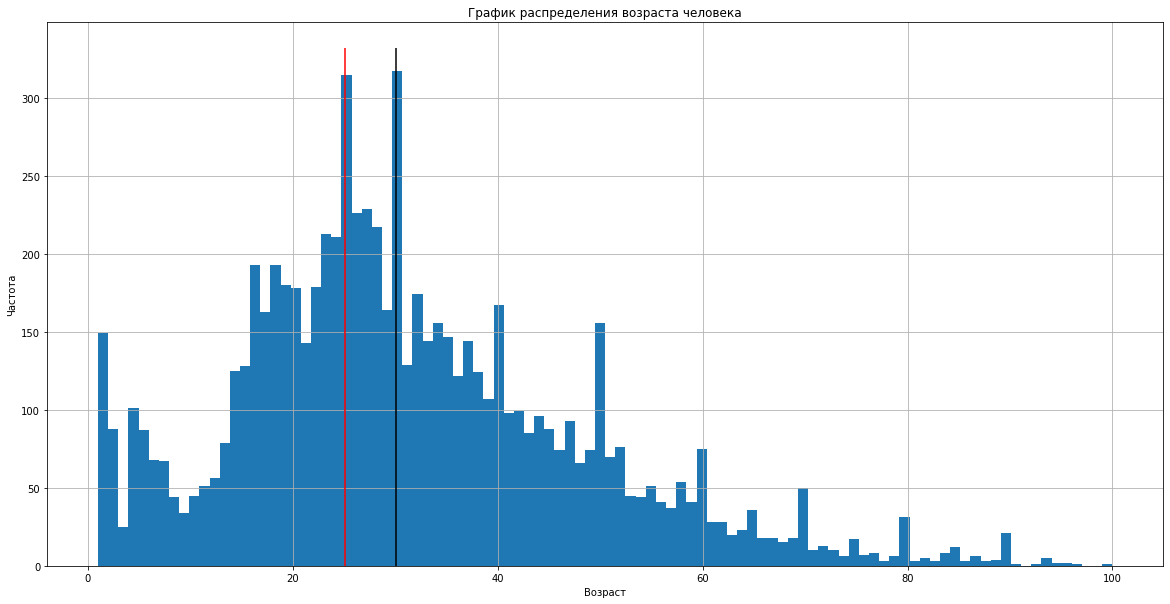

In [9]:
plt.figure(figsize=(20, 10))
plt.hist(labels['real_age'], bins=(100))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('График распределения возраста человека')
plt.grid(True)

plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2 - 5,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'red',
)

plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'black',
)

print(f'Часто встречаемый возраст человека: {round((labels.real_age.median() + labels.real_age.mean()) / 2 - 5)} и {round((labels.real_age.median() + labels.real_age.mean()) / 2)}')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Информативная гистограмма. Молодец, что не забываешь про оформление графиков: есть название и подписи осей.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Рекомендую увеличить количество корзин (bins) до 100, это поможет лучше увидеть некоторые особенности наших данных.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1</b></font>

Изменил с `bins=(50)` на `bins=(100)`. Здесь заметил, что есть 2 значения возраста, которые чаще всего встречаются в датасете. Потом немного изменил график для наилучшей иллюстрации, добавил:
```
    plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2 - 5,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'red',
)

plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'black',
)

print(f'Часто встречаемый возраст человека: {round((labels.real_age.median() + labels.real_age.mean()) / 2 - 5)} и {round((labels.real_age.median() + labels.real_age.mean()) / 2)}')
```

</div>

Этот график напоминает на пуассоновское распределение, т.е. это статистическое распределение, которое показывает, сколько раз событие может произойти в течение определенного периода времени. 

### Вывод изображений 

In [10]:
datagen = ImageDataGenerator(rescale=1./255)

data_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменных train_datagen  и train_gen_flow. На мой взгляд они не соответсвуют тому, что в них, ведь ты еще не производишь разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1</b></font>

Действительно, машинально напечатал, не задумвая об этом. Покорректировал названия переменной с
```
train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)
```
на:
```
datagen = ImageDataGenerator(rescale=1./255)

data_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)
```
</div>

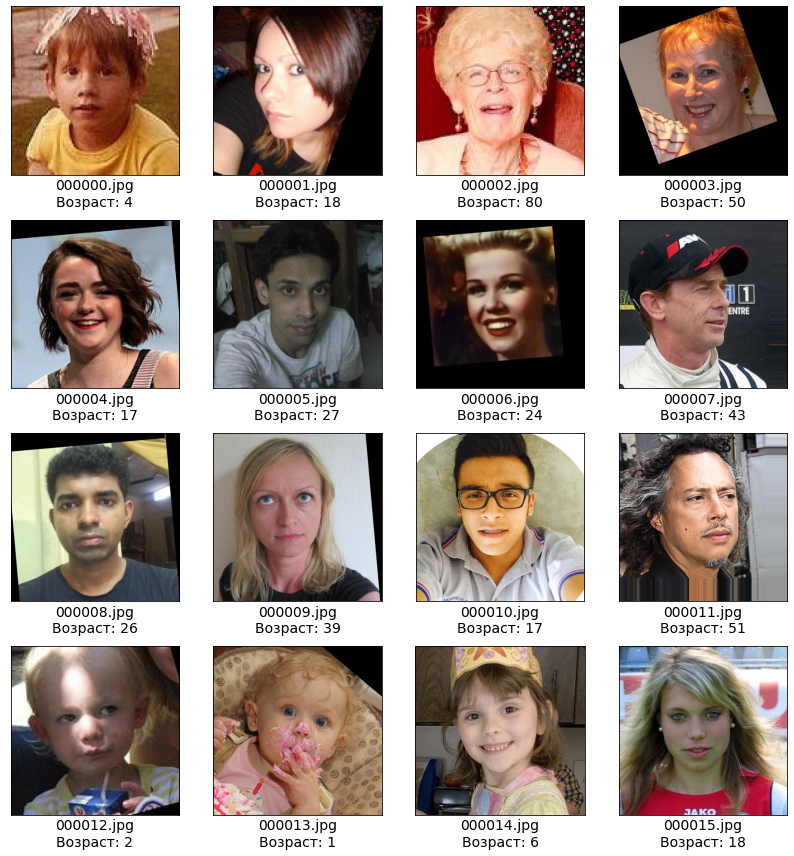

In [12]:
fig = plt.figure(figsize=(12,12));
for i in range(0,16):
    image = imread(data_gen_flow.directory+labels['file_name'][i])    
    fig.add_subplot(4,4,i+1)
    
    plt.imshow(image)
    
    plt.xticks([]);plt.yticks([]);
    plt.xlabel(labels['file_name'][i]+'\nВозраст: '+str(labels['real_age'][i]),fontsize=14)
    plt.tight_layout();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, что кроме изображений выводишь информацию о  возрасте </div>

### Промежуточный вывод

На основе вышеперечисленных можно сделать вывод, что чаще всего в датасете встречаются люди с возрастом `30 лет`. А размер выборки соствляет `7591`. Качество изображения с датасет вполне хорошее, мало встречается артефакты, например, у фотографии `000011.jpg` нижняя часть изображения видны.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, есть выводы после исследования данных.    
    
Что еще можно увидеть на фото:
    
 - есть цветные и черно-белые
 - Фото лицо находится  в центре, часть фото подвергнута операции поворота (похоже с целью выровнять), но не везде это прошло успешно, на фото с плохим качеством или с посторонними предметами алгоритм, с помощью которого происходило выравнивание ошибся.
</div>

## Обучение модели

```python

# Подключение библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

import matplotlib.pyplot as plt
import numpy as np


# Загрузка обучающей выборки
def load_train(path):
    datagen = ImageDataGenerator(
        # Получаем 25% долю от данных для валидационной проверки
        validation_split=0.25, 
        # Генерирует случайным образом зеральное отражение для повышения качеств обучения
        horizontal_flip=True, 
        # Уменьшение масштаба модели
        rescale=1. / 255
    )
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


# Загрузка тестовой выборки
def load_test(path):
    datagen = ImageDataGenerator(        
        # Получаем 25% долю от данных для валидационной проверки
        validation_split=0.25, 
        # Уменьшение масштаба модели
        rescale=1. / 255
    )
    
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


# In[ ]:


# Создание модели
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False) 
    
    # Инициализируем модель глубокого обучения
    model = Sequential()
    # Добавляем модель ResNet50
    model.add(backbone)
    # Добавляем модель GlobalAveragePooling2D
    model.add(GlobalAveragePooling2D())
    # Добавляем модель Dense с активацией "relu"
    model.add(Dense(1, activation='relu'))
    
    # Для настройки гиперпараметров: Основной настраиваемый гиперпараметр в алгоритме Adam — скорость обучения (learning rate). 
    # Это шаг градиентного спуска, с которого алгоритм стартует.
    # По умолчанию он равен 0.01. Уменьшение шага иногда может замедлить обучение, но улучшить итоговое качество модели.
    optimizer_adam = Adam(lr=0.01)
    
    # Также устанавливаем параметры, отвечающие за обучение
    model.compile(optimizer=optimizer_adam, loss='mean_squared_error', metrics=['mae'])
    
    return model

# Запуск модели
def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
Молодец, что используешь агументацию для обучающего набора. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

```

# Train for 356 steps, validate for 119 steps
# Epoch 1/10
# 2023-05-15 13:26:52.221544: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
# 2023-05-15 13:26:52.539556: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
# 356/356 - 64s - loss: 215.6088 - mae: 10.6122 - val_loss: 705.9674 - val_mae: 21.5358
# Epoch 2/10
# 356/356 - 67s - loss: 84.5707 - mae: 6.9750 - val_loss: 164.0117 - val_mae: 9.6336
# Epoch 3/10
# 356/356 - 69s - loss: 54.7848 - mae: 5.6227 - val_loss: 80.7079 - val_mae: 6.6989
# Epoch 4/10
# 356/356 - 68s - loss: 42.7224 - mae: 4.9490 - val_loss: 92.2831 - val_mae: 7.5083
# Epoch 5/10
# 356/356 - 68s - loss: 33.5699 - mae: 4.4030 - val_loss: 83.9321 - val_mae: 7.0734
# Epoch 6/10
# 356/356 - 43s - loss: 26.1638 - mae: 3.8782 - val_loss: 71.7095 - val_mae: 6.4015
# Epoch 7/10
# 356/356 - 42s - loss: 21.6567 - mae: 3.5772 - val_loss: 74.1264 - val_mae: 6.4298
# Epoch 8/10
# 356/356 - 43s - loss: 18.9548 - mae: 3.3102 - val_loss: 69.2546 - val_mae: 6.2176
# Epoch 9/10
# 356/356 - 43s - loss: 16.3927 - mae: 3.0635 - val_loss: 63.2988 - val_mae: 5.9638
# Epoch 10/10
# 356/356 - 42s - loss: 13.6584 - mae: 2.8123 - val_loss: 65.7167 - val_mae: 6.0708
# WARNING:tensorflow:sample_weight modes were coerced from
#   ...
#     to  
#   ['...']
# 119/119 - 10s - loss: 65.7167 - mae: 6.0708
# Test MAE: 6.0708

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Анализ обученной модели

После обучения с применением технологии `ResNet50` **Среднее абсолютная ошибка - MSE** дали неплохие результаты - `6,0708`. Это самая низкая показатель С.А.О _(чем ближе к 0, тем лучше)_. Значит модель редко ошибается по предсказанию возраста человека по фотографии.

Для обучения нейроной сети были использованы следующие использованные архиектуры (backbone, head):
- backbone:
```
    backbone = ResNet50(input_shape=input_shape,
                weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                include_top=False)
```
Мы применили `backbone` для заморозки, т.к. она позволяет избавиться от переобучения и повысить скорость обучения сети:  градиентному спуску считать производные для замороженных слоёв не нужно. Потому что у нас небольшой датасет: размер составляет `7591`. Если на таком датасете обучить ResNet50, то она гарантированно переобучится: в ней слишком много параметров — порядка 23 млн. После чего у сети будут идеальные предсказания на обучающей выборке и случайные — на тестовой.

- head:
```
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
```
    Почему так устанавлены параметры, потому что мы сначала замораживаем в целях избежания переобучения с готовой преодобученной модели `resnet50_weights_tf_dim_ordering_tf_kernels_notop`. Затем добавляем слой `GlobalAveragePooling2D`, чтобы выполнять глобальную операцию среднего пулина, т.е. `average pooling` по пространственным измерениям, которые извлекли еще с признаков. Затем добавили последний выходной полносвязный слой - `Dense`, который принимает входные признаки после глобального среднего пулинга и генерирует предсказания для задачи регрессии - возраста человека.

А теперь ознакомимся со списками параметров обучения:
- Размер батча (`batch_size`) задается в функции загрузки данных (`ImageDataGenerator`), в нашем случае по-умолчанию стоит `None`.
- Оптимизатор (`optimizer`) определен как Adam с коэффициентом скорости обучения (`learning rate`) 0.01.
- Функция потерь (`loss`) установлена как среднеквадратичная ошибка (`mean_squared_error`).
- Метрика (`metrics`) для оценки модели установлена на среднюю абсолютную ошибку (`mean absolute error`, `MAE`).

Чтобы сказать, что модель достигнула необходимые им метрики, наблюдалось ли переобучение, сначала снова рассмотрим на полученную информацию после обучения (см. выше):

- Значение функции потерь (`loss`) уменьшается с каждой эпохой как на обучающей выборке, так и на валидационной выборке. Это говорит о том, что модель успешно учится и снижает ошибку на обоих наборах данных.

- Значение средней абсолютной ошибки (`MAE`) также уменьшается с каждой эпохой как на обучающей выборке, так и на валидационной выборке. Это означает, что модель все более точно предсказывает возраст и улучшает свою производительность.

Извлекем полученные значения, чтобы построить график (Предположим, что данные обучены и извлекли на одном и том же компьютере)

In [18]:
data_info = pd.DataFrame({
    'loss':[215.6088, 84.5707, 54.7848, 42.7224, 33.5699, 26.1638, 21.6567, 18.9548, 16.3927, 13.6584], 
    'mae': [10.6122, 6.9750, 5.6227, 4.9490, 4.4030, 3.8782, 3.5772, 3.3102, 3.0635, 2.8123],
    'val_loss': [705.9674, 164.0117, 80.7079, 92.2831, 83.9321, 71.7095, 74.1264, 69.2546, 63.2988, 65.7167],
    'val_mae': [21.5358, 9.6336, 6.6989, 7.5083, 7.0734, 6.4015, 6.4298, 6.2176, 5.9638, 6.0708],
    'time [s]': [64, 67, 69, 68, 68, 43, 42, 43, 43, 42]
})
data_info

,loss,mae,val_loss,val_mae,time [s]
0,215.6088,10.6122,705.9674,21.5358,64
1,84.5707,6.9750,164.0117,9.6336,67
2,54.7848,5.6227,80.7079,6.6989,69
3,42.7224,4.9490,92.2831,7.5083,68
4,33.5699,4.4030,83.9321,7.0734,68
5,26.1638,3.8782,71.7095,6.4015,43
6,21.6567,3.5772,74.1264,6.4298,42
7,18.9548,3.3102,69.2546,6.2176,43
8,16.3927,3.0635,63.2988,5.9638,43
9,13.6584,2.8123,65.7167,6.0708,42


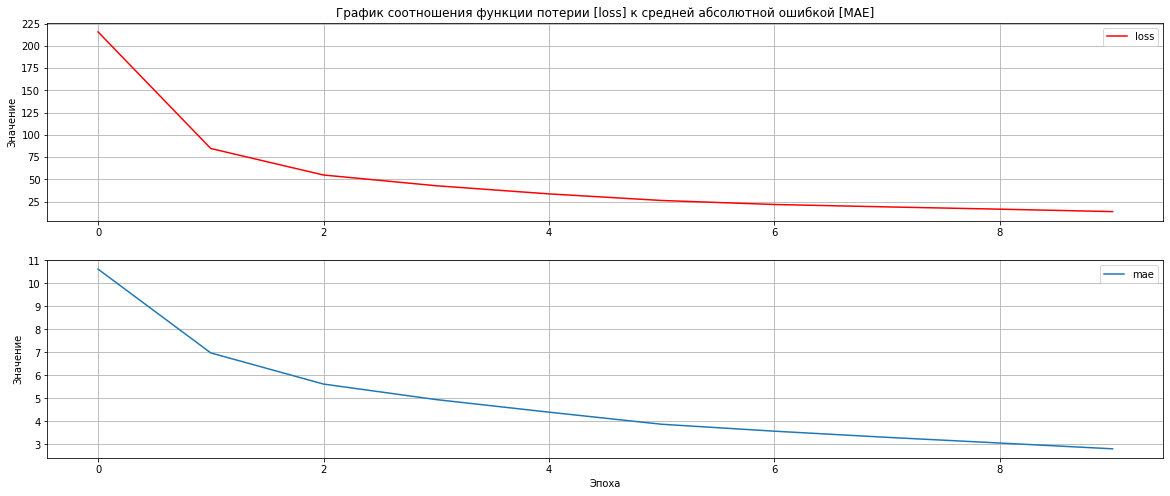

In [86]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

axs[0].plot(data_info['loss'], color='red')
axs[0].set_ylabel('Значение')
axs[0].legend(['loss'])
axs[0].set_title('График соотношения функции потерии [loss] к средней абсолютной ошибкой [MAE]')
axs[0].grid(True)

axs[1].plot(data_info['mae'])
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Значение')
axs[1].legend(['mae'])
axs[1].grid(True)

Как и видим, что вместе с другими значениями функция убывается. Следовательно, на основе этого графика можно сделать вывод, что модель успешно учится и снижает ошибку на обоих наборах данных и все более точно предсказывает возраст и улучшает свою производительность

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А что такое С.К.О.? Если среднеквадратичное отклонение, то здесь ты не прав. В качестве метрики мы используем MAE, среднее абсолютное отклонение.    
    
***
    
В этом разделе стоит подробно расписать используемые для создания и обучения модели подходы:
    
 - Использованная архитектура (бэкбон + голова), а также загружались ли предобученные  или рандомные веса.
 - Параметры обучения: размер батча, оптимизатор, использовалась ли заморозка весов бэкбона,  количество эпох.
 - Достигнутые метрики, наблюдалось ли переобучение.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1</b></font>

Ах да, грубая опечатка, подправил. А также добавил описание и график, расширены выводы 

</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
    
    
        
Жду твой проект на фина/льное ревью :)
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1</b></font>

Я б хотел попросить у тебя не принимать проект сразу, т.к. пока время еще есть, до понедельинка. Мне хотелось бы отшлифовать его как можно больше
   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  

</div>